---
---

<h1><center><ins>Numerical Methods: Exam 1</ins></center></h1>
<h2><center>November 12, 09:45-11:15 </center></h2>

Please compute the below questions in the python notebook, *documenting your code* where needed. 

Remember also to **_answer any discussion points asked in the question_**.  

***Before 11:20*** your notebook needs to be uploaded to Moodle, and/or emailed to (both) Kristina and Alina <br> (kristina.kislyakova@univie.ac.at, alina.boecker@univie.ac.at)<br>
<br>
This means you have roughly 60 minutes to complete the exercises in this part.

You may use the lecture notes and any of your exercise notebooks freely, but you can **not** use ChatGPT code assistant or other AI coding tools.<br> 
**_Collaboration or plagarized code in any way is prohibited and no phones or communication will be allowed_**.

---
---

In [67]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv, lu_solve, lu_factor
from scipy.interpolate import CubicSpline

## Exercise 1 (9 Points)

Consider the system:

$$
\begin{cases}
2x_1 + 2x_2 + 2x_3 = 6 \\
2.001x_1  + 2x_2 + 2x_3 = 6.001 \\
2x_1  + 2.001x_2 + 2x_3 = 6.001
\end{cases}
$$

**(a)** Write the system in matrix form $A\mathbf{x} = \mathbf{b}$. Solve for $\mathbf{x}$ by calculating the inverse of $A$ (Hint: under https://numpy.org/doc/stable/reference/routines.linalg.html#solving-equations-and-inverting-matrices you should find the build-in function you are looking for). (1 Point)

In [68]:
from numpy import linalg

A = np.array([[2, 2, 2], [2.001, 2, 2], [2, 2.001, 2]])
b = np.array([6, 6.001, 6.001])

x_np = linalg.solve(A, b)
print(x_np)
A_inv = linalg.inv(A)
print(np.dot(A_inv, b))

print(f"Difference: {np.dot(A, x_np) - b}")

[1. 1. 1.]
[1. 1. 1.]
Difference: [0.0000000e+00 0.0000000e+00 8.8817842e-16]


**(b)** Perform LU decomposition to find the solution vector $\mathbf{x}$. Calculate the difference between the exact solution $\mathbf{b}$ and your numerical one. Is it the same for the two methods? What does this imply for possibly even larger and thus more complex matrices? (1.5 Points)

In [69]:
from scipy.linalg import lu, lu_solve, lu_factor

P, L, U = lu(A)

print(f"L (Lower triangular matrix):\n{L}")

print(f"\nU (Upper triangular matrix):\n{U}")

# Solve the system using LU decomposition
lu_factorization = lu_factor(A)
x = lu_solve(lu_factorization, b)

print("\nSolution vector x:")
print(x)

# Verify solution
check = np.dot(A, x)
print("\nVerification (A·x):")
print(check)
print("\nOriginal RHS vector b:")
print(b)
print(f"\nDifference: {check-b}")
print(f"\ndifference between methods: {np.dot(A, x_np) - check}")
print(f"\nerror is really small but we also only have a 3x3 matrix and for larger problems\n\
with even more variables, the error will surely get bigger")

L (Lower triangular matrix):
[[1.         0.         0.        ]
 [0.99950025 1.         0.        ]
 [0.99950025 0.49987503 1.        ]]

U (Upper triangular matrix):
[[2.00100000e+00 2.00000000e+00 2.00000000e+00]
 [0.00000000e+00 1.99950025e-03 9.99500250e-04]
 [0.00000000e+00 0.00000000e+00 4.99875031e-04]]

Solution vector x:
[1. 1. 1.]

Verification (A·x):
[6.    6.001 6.001]

Original RHS vector b:
[6.    6.001 6.001]

Difference: [0.0000000e+00 0.0000000e+00 8.8817842e-16]

difference between methods: [0. 0. 0.]

error is really small but we also only have a 3x3 matrix and for larger problems
with even more variables, the error will surely get bigger


Now consider the function

$$y = f(x) = \frac{1}{1+x^2}$$

**(c)** Plot the function on a domain of [-10,10] in x. Calculate the numerical derivative of the function using the forward finite difference and plot the result next to it (Hint: use a subplot). Choose the step-size $h$ such that the truncation error is 1e-2 at $x=1$. (Hint: the truncation error is $\epsilon\sim\frac{|f^{\prime\prime}(x)|}{2}h$). (3 Points)

h: 0.04


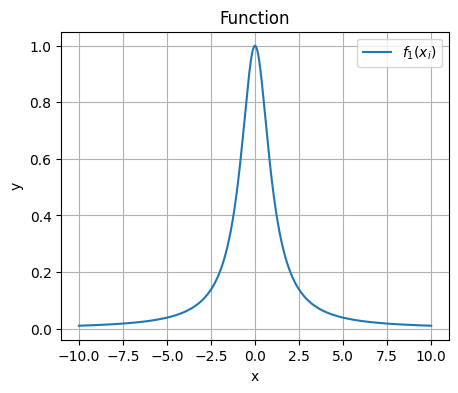

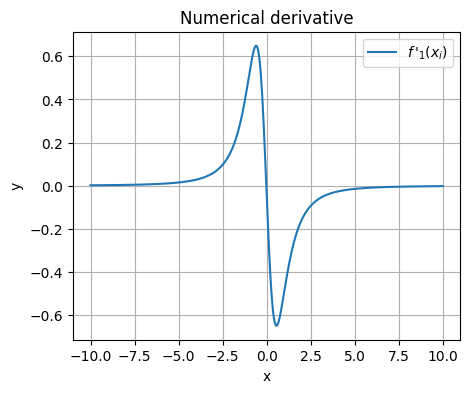

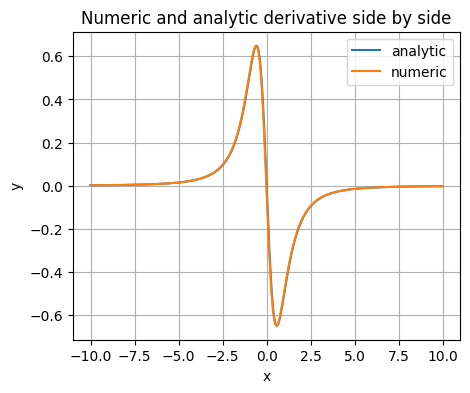

In [70]:
def f(x):
    return 1 / (1+x**2)

def df_num(x, f, h):
    df = (f(x+h) - f(x)) / h
    return df

# derivatives calculated with wolfram alpha 
def df(x):
    return (-2*x) / ((1+x**2)**2)

def ddf(x):
    return (6*x**2 - 2) / ((1+x**2)**3)


xi = np.linspace(-10, 10, 1000)
h = 2* 1e-2 / np.abs(ddf(1)) # given formula for the error rewritten to solve for h
print("h:", h)



df_num1 = df_num(xi, f, h)



plt.figure(figsize=(5,4))
plt.plot(xi, f(xi), label="$f_1$($x_i$)")
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

plt.figure(figsize=(5,4))
plt.plot(xi, df_num1, label="$f\\,'_1$($x_i$)")
plt.title("Numerical derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

plt.figure(figsize=(5,4))
plt.plot(xi, df(xi), label="analytic")
plt.plot(xi, df_num1, label="numeric")
plt.title("Numeric and analytic derivative side by side")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

**(d)** Now calculate the second derivative of y numerically. Use the same step-size as before as well as one that is 10 times larger. Using the samples of x with step-size of $10h$, interpolate y using a cubic spline (from scipy.interpolate.CubicSpline: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline). Use the CubicSpline to find the second derivative using step-size $10h$ (Hint: look at the first example under the link). Compare all three numerical derivatives in a figure. What is your conclusion? (3.5 Points)

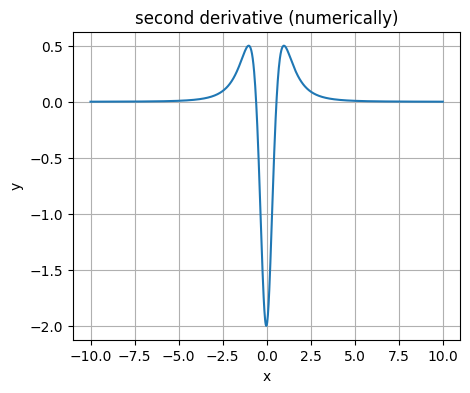

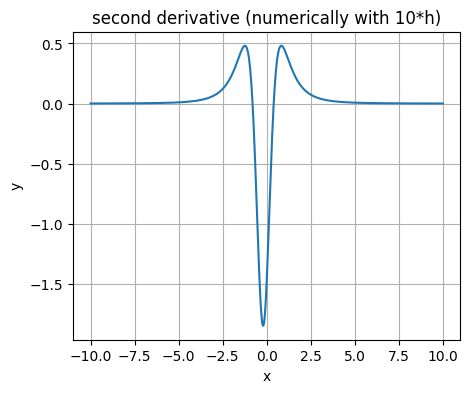

In [71]:
from scipy.interpolate import CubicSpline

h10 = h*10

ddf_num = df_num(xi, df, h) # don't know if I should use the numerical df here too but they are very similar, so it does not make much of a difference
ddf10_num = df_num(xi, df, h10)



plt.figure(figsize=(5,4))
plt.plot(xi, ddf_num, label="$f_1$($x_i$)")
plt.title("second derivative (numerically)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.figure(figsize=(5,4))
plt.plot(xi, ddf10_num, label="$f_1$($x_i$)")
plt.title("second derivative (numerically with 10*h)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

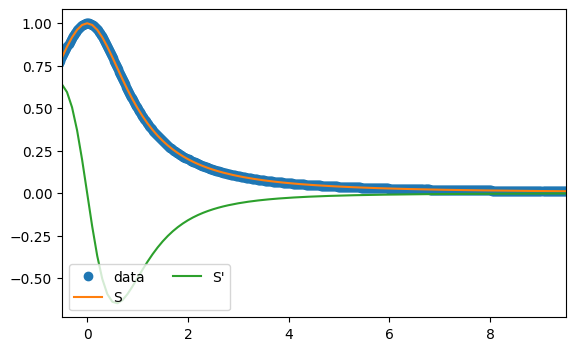

In [72]:
cs = CubicSpline(xi, f(xi))

xs = np.arange(-10, 10, 0.1)

fig, ax = plt.subplots(figsize=(6.5, 4))

ax.plot(xi, f(xi), 'o', label='data')

ax.plot(xs, cs(xs), label="S")

ax.plot(xs, cs(xs, 1), label="S'")

ax.set_xlim(-0.5, 9.5)

ax.legend(loc='lower left', ncol=2)

plt.show()

**(e) Extra Point**  Now add a random error of 1\% to your values of y evaluated with step-size $h$ (Hint: use np.random.normal(y,0.01)). Calculate again the first numerical derivative. Which percentage level is the difference between the new derivative values and the ones from **(c)**? Comment on what is happening. (1 Point)

## Exercise 2 (9 Points)

Consider the following two curves:
$$ f(x) = 6 - (x+2)^2 $$
$$ g(x) = \frac{1}{2}x $$

**(a)** Use _**your own version**_ of the **Newton Raphson method** to find the two intersections of these two curves (Hint: You can reformulate the problem as finding the roots of a single function built from the two given ones.). Plot the two curves in a figure to understand sensible guesses for the two starting points. Also plot the two two intersection points you found with the Newton Raphson method. (Hint: Use xlims=[-10,10] and ylims=[-10,10] for the plot). (2 Points)

0.4494897427831848 -4.449489742783178


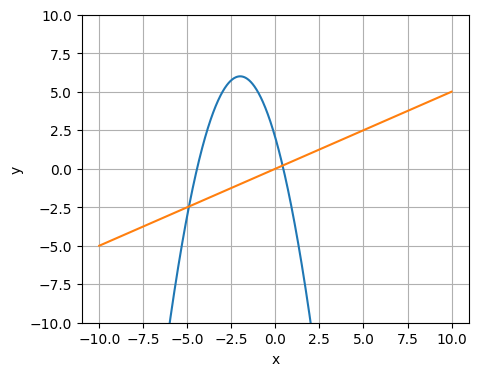

In [88]:
def f(x):
    return 6 - (x+2)**2

def g(x):
    return 1/2 * x

#wolfram alpha
def dgf(x):
    return -(3*x**2) / 2 - 4*x +1

def gf(x):
    return 1/2 * x * (6-(x+2)**2)

def newton_raphson(x0, tol, max_iter):
    for i in range(max_iter):
        x1 = x0 - gf(x0)/dgf(x0)
        if abs(f(x1)) < tol and abs(x1 - x0) < tol:
            return x1, i+1
        x0 = x1
    print("Newton-Raphson did not converge.")




tol = 1e-6
max_iter = 100000


intersection1 = newton_raphson(7, tol, max_iter)
intersection2 = newton_raphson(-8, tol, max_iter)
print(intersection1[0], intersection2[0])

plt.figure(figsize=(5,4))
plt.plot(xi, f(xi), label="f(x)")
plt.plot(xi, g(xi), label="g(x)")
#plt.title("second derivative (numerically)")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-10, 10)
plt.grid(True)

 **(a)** as the upper and lower limits for the integration). Sample the integrand at 100 equally spaced abscissae. Compare this result with the **_build-in version_** of **scipy.integrate.quad**, which uses adaptive Gaussian quadrature. (3 Points)

In [90]:
from scipy.integrate import quad

**(b)** Use _**your own version**_ of the **Trapezoid method** to find the area between the two curves (Hint: use the points calculated from

In [ ]:
def trapz(x, y):
    s = 0
    for i in range(len(x)-1):
        dx = x[i+1] - x[i]
        s += 0.5 * (y[i] + y[i+1]) * dx
    return s



**(c)** How many samples of abscissae do you need for your Trapezoid method in order to reach the same result provided by scipy.integrate.quad with a precision of 1e-4? Per iteration multiply the number of abscissae by 10. How does this compare to the error returned by the scipy.integrate.quad routine? Comment on this. (3 Points)

**(d)** In your figure from **(a)** shade the area you calculated between the two curves. Hint: Use fill_between from matplotlib. (1 Point)